## Load the Libraries

First, we load the libraries needed for data cleaning

In [1]:
import pandas as pd
df = pd.read_csv('water_quality.csv')
df.head()

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

We first understand the data types of each column to check whether they are numerical or categorical.

In [2]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB
None


## Data Cleaning
We check if there are any missing values or duplicate data in the dataset.

In [3]:
print(df.isnull().sum())

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64


In [4]:
duplicates = df.duplicated()

#count total duplicates 
duplicate_count = duplicates.sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 0


Looks like there are missing values but no duplicate data. Therefore, we fill in the missing values with the mean of each column; we choose mean because it preserves the distribution of the dataset. After that, we save the cleaned dataset into another dataset to preserve the integrity of the original dataset.

In [5]:
#Replace null values based on the group mean of potable and non-potable
df['ph'] = df['ph'].fillna(df.groupby(['Potability'])['ph'].transform('mean'))
df['Sulfate'] = df['Sulfate'].fillna(df.groupby(['Potability'])['Sulfate'].transform('mean'))
df['Trihalomethanes'] = df['Trihalomethanes'].fillna(df.groupby(['Potability'])['Trihalomethanes'].transform('mean'))
df.to_csv('cleaned_water_quality.csv', index=False)

## Exploratory data analysis (EDA)

To visualize the distribution of numerical variables, we use histograms. In addition, we use bar plots to visualize categorical variables.

In [6]:
cleaned_df = pd.read_csv('cleaned_water_quality.csv')
cleaned_df.describe()

ph     Hardness        Solids  Chloramines      Sulfate  \
count  3276.000000  3276.000000   3276.000000  3276.000000  3276.000000   
mean      7.080855   196.369496  22014.092526     7.122277   333.785123   
std       1.469958    32.879761   8768.570828     1.583085    36.145701   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.277673   176.850538  15666.690297     6.127421   317.094638   
50%       7.085378   196.967627  20927.833607     7.130299   334.564290   
75%       7.870050   216.667456  27332.762127     8.114887   350.385756   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3276.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.395671     3.966786     0.390110  
std       80.824064        3.308162        15.769901     0.780382     0.487849  
min      181.483754        2.200000         0.738000     1.450000     0.000000  
25%      365.734414       12.065801        56.647656     3.439711     0.000000  
50%      421.884968       14.218338        66.303555     3.955028     0.000000  
75%      481.792304       16.557652        76.666609     4.500320     1.000000  
max      753.342620       28.300000       124.000000     6.739000     1.000000

<b>Histogram</b>

C:\Users\Yap Jack\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Yap Jack\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Yap Jack\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Yap Jack\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When groupin

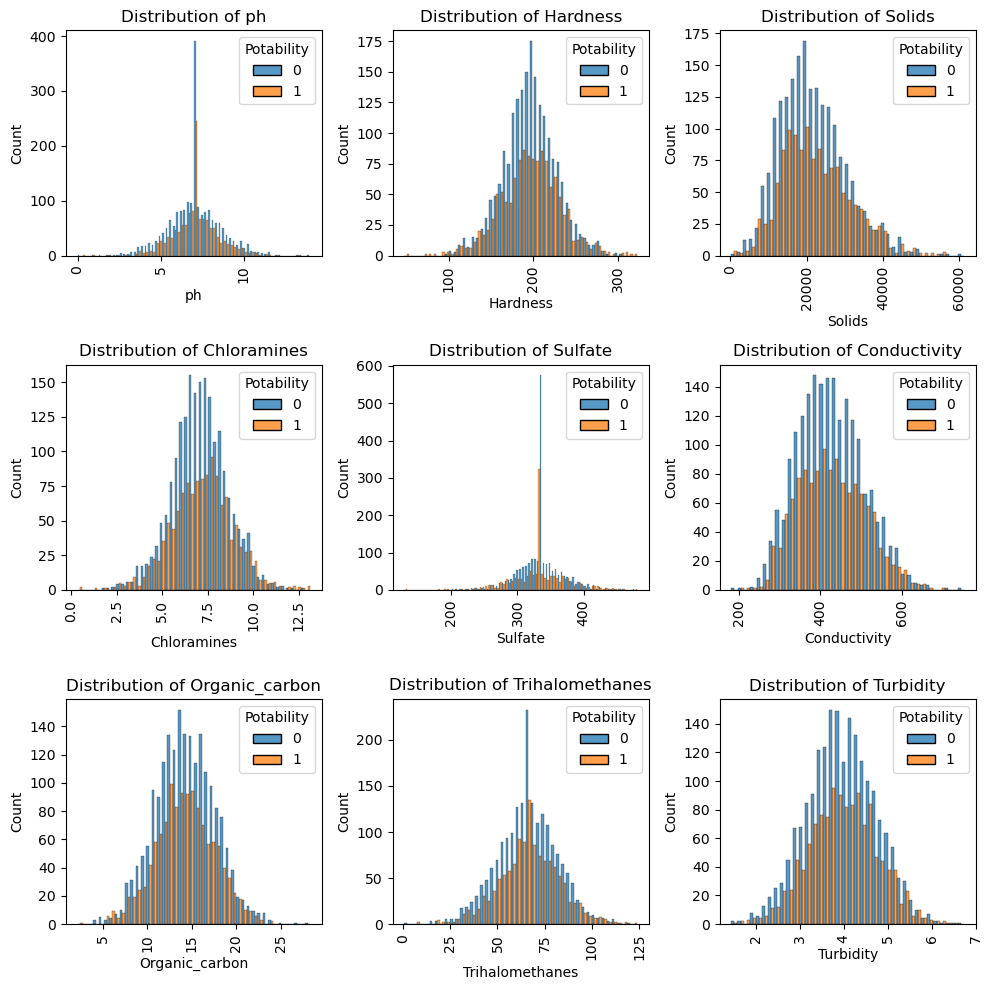

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

#plot the histogram of all features for potable and non-potable 
plt.figure(figsize = (10, 10))
for i, col in enumerate(cleaned_df.columns[:-1], 1):
    plt.subplot(3, 3, i)
    sns.histplot(x = df[col], hue = df["Potability"], multiple = "dodge")
    plt.title(f"Distribution of {col}")
    plt.tight_layout()
    plt.xticks(rotation = 90)
    plt.plot()

This code displays the mean and median of non-potable and potable data.

In [8]:
# Separate the data into non-potable and potable
non_potable_df = cleaned_df[cleaned_df.iloc[:, -1] == 0]
potable_df = cleaned_df[cleaned_df.iloc[:, -1] == 1]

# Calculate means and medians for non-potable and potable data
non_potable_means = non_potable_df.mean()
non_potable_medians = non_potable_df.median()

potable_means = potable_df.mean()
potable_medians = potable_df.median()

# Print the results
for col in cleaned_df.columns[:-1]:
    print(f"Column: {col}")
    print(f"Non-potable Mean: {non_potable_means[col]}")
    print(f"Non-potable Median: {non_potable_medians[col]}")
    print(f"Potable Mean: {potable_means[col]}")
    print(f"Potable Median: {potable_medians[col]}\n")


Column: ph
Non-potable Mean: 7.085378435983544
Non-potable Median: 7.085378435983544
Potable Mean: 7.073783295381199
Potable Median: 7.073783295381199

Column: Hardness
Non-potable Mean: 196.73329218472793
Non-potable Median: 197.12342321605394
Potable Mean: 195.80074426259276
Potable Median: 196.6329070886398

Column: Solids
Non-potable Mean: 21777.490788123265
Non-potable Median: 20809.618279605398
Potable Mean: 22383.99101780775
Potable Median: 21199.38661404485

Column: Chloramines
Non-potable Mean: 7.092174563443736
Non-potable Median: 7.090333864655992
Potable Mean: 7.169338026214626
Potable Median: 7.215163009948823

Column: Sulfate
Non-potable Mean: 334.5642895786881
Non-potable Median: 334.5642895786881
Potable Mean: 332.56699023366554
Potable Median: 332.56699023366554

Column: Conductivity
Non-potable Mean: 426.7304535650347
Non-potable Median: 422.2293312022622
Potable Mean: 425.38379997895566
Potable Median: 420.71272912166967

Column: Organic_carbon
Non-potable Mean: 14.3

<b>Pie Chart</b>

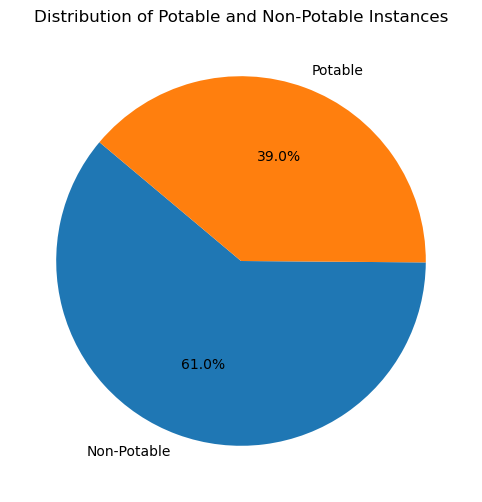

In [9]:
import matplotlib.pyplot as plt

#count all values of potability 
potability_counts = cleaned_df['Potability'].value_counts()
labels = ['Non-Potable', 'Potable']

#plot the boxplot of potable and non-potable
plt.figure(figsize=(8, 6))
plt.pie(potability_counts, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Potable and Non-Potable Instances')
plt.show()

<b>Boxplot</b>

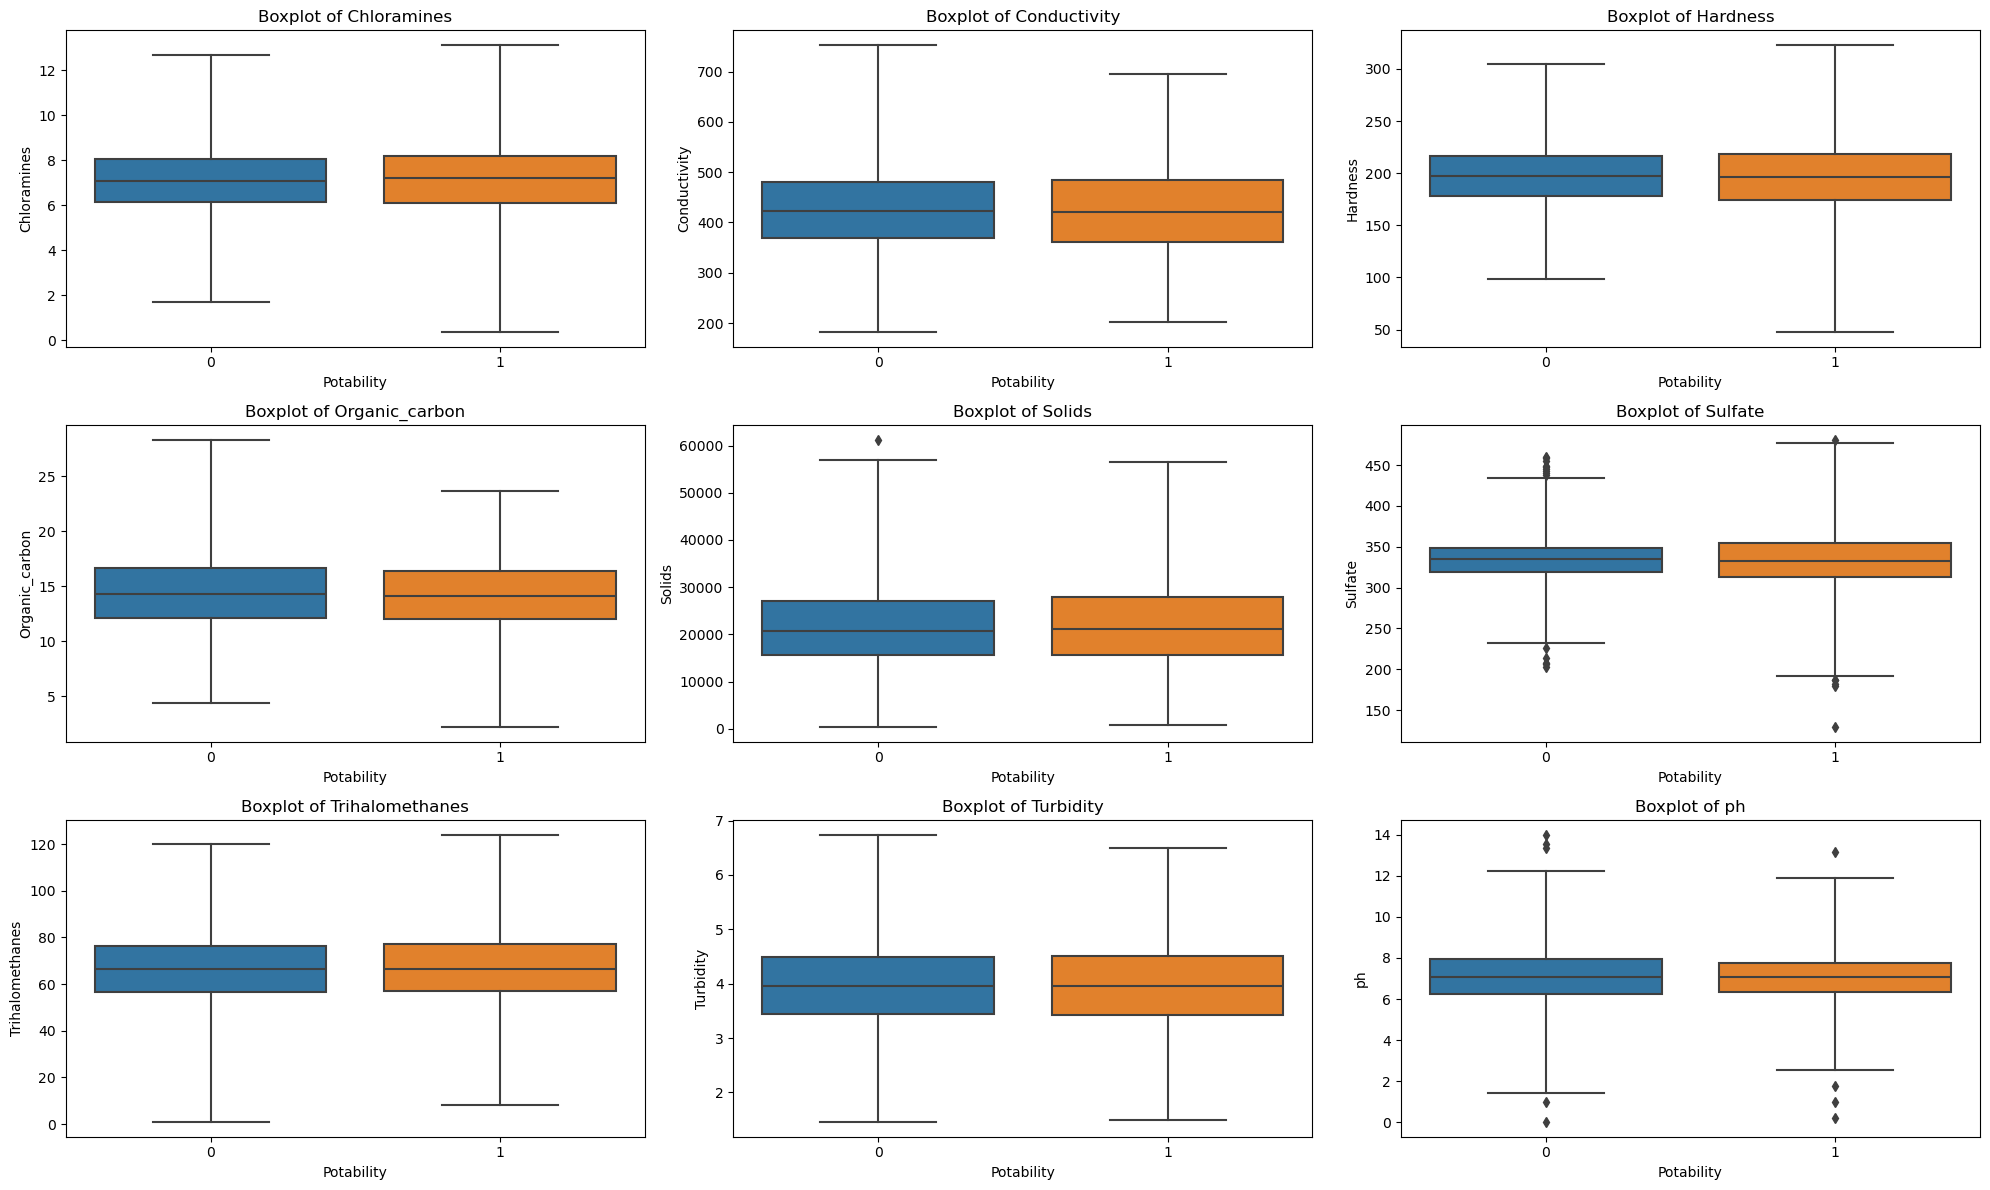

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

#exclude potability column
cols_exclude = ['Potability']
cols = cleaned_df.columns.difference(cols_exclude)

#set the matrix
n_cols = 3
n_rows = len(cols) // n_cols + (len(cols) % n_cols > 0)

#plot the boxplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 12))
axes = axes.flatten()

for i, col in enumerate(cols):
    sns.boxplot(x='Potability', y=col, data=cleaned_df, ax=axes[i], whis=3)  #Display potable and non-potable distribution
    axes[i].set_title('Boxplot of {}'.format(col))
    axes[i].set_xlabel('Potability')  #Set x-axis label

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


<b>Pairplot</b>

C:\Users\Yap Jack\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Yap Jack\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Yap Jack\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Yap Jack\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to p

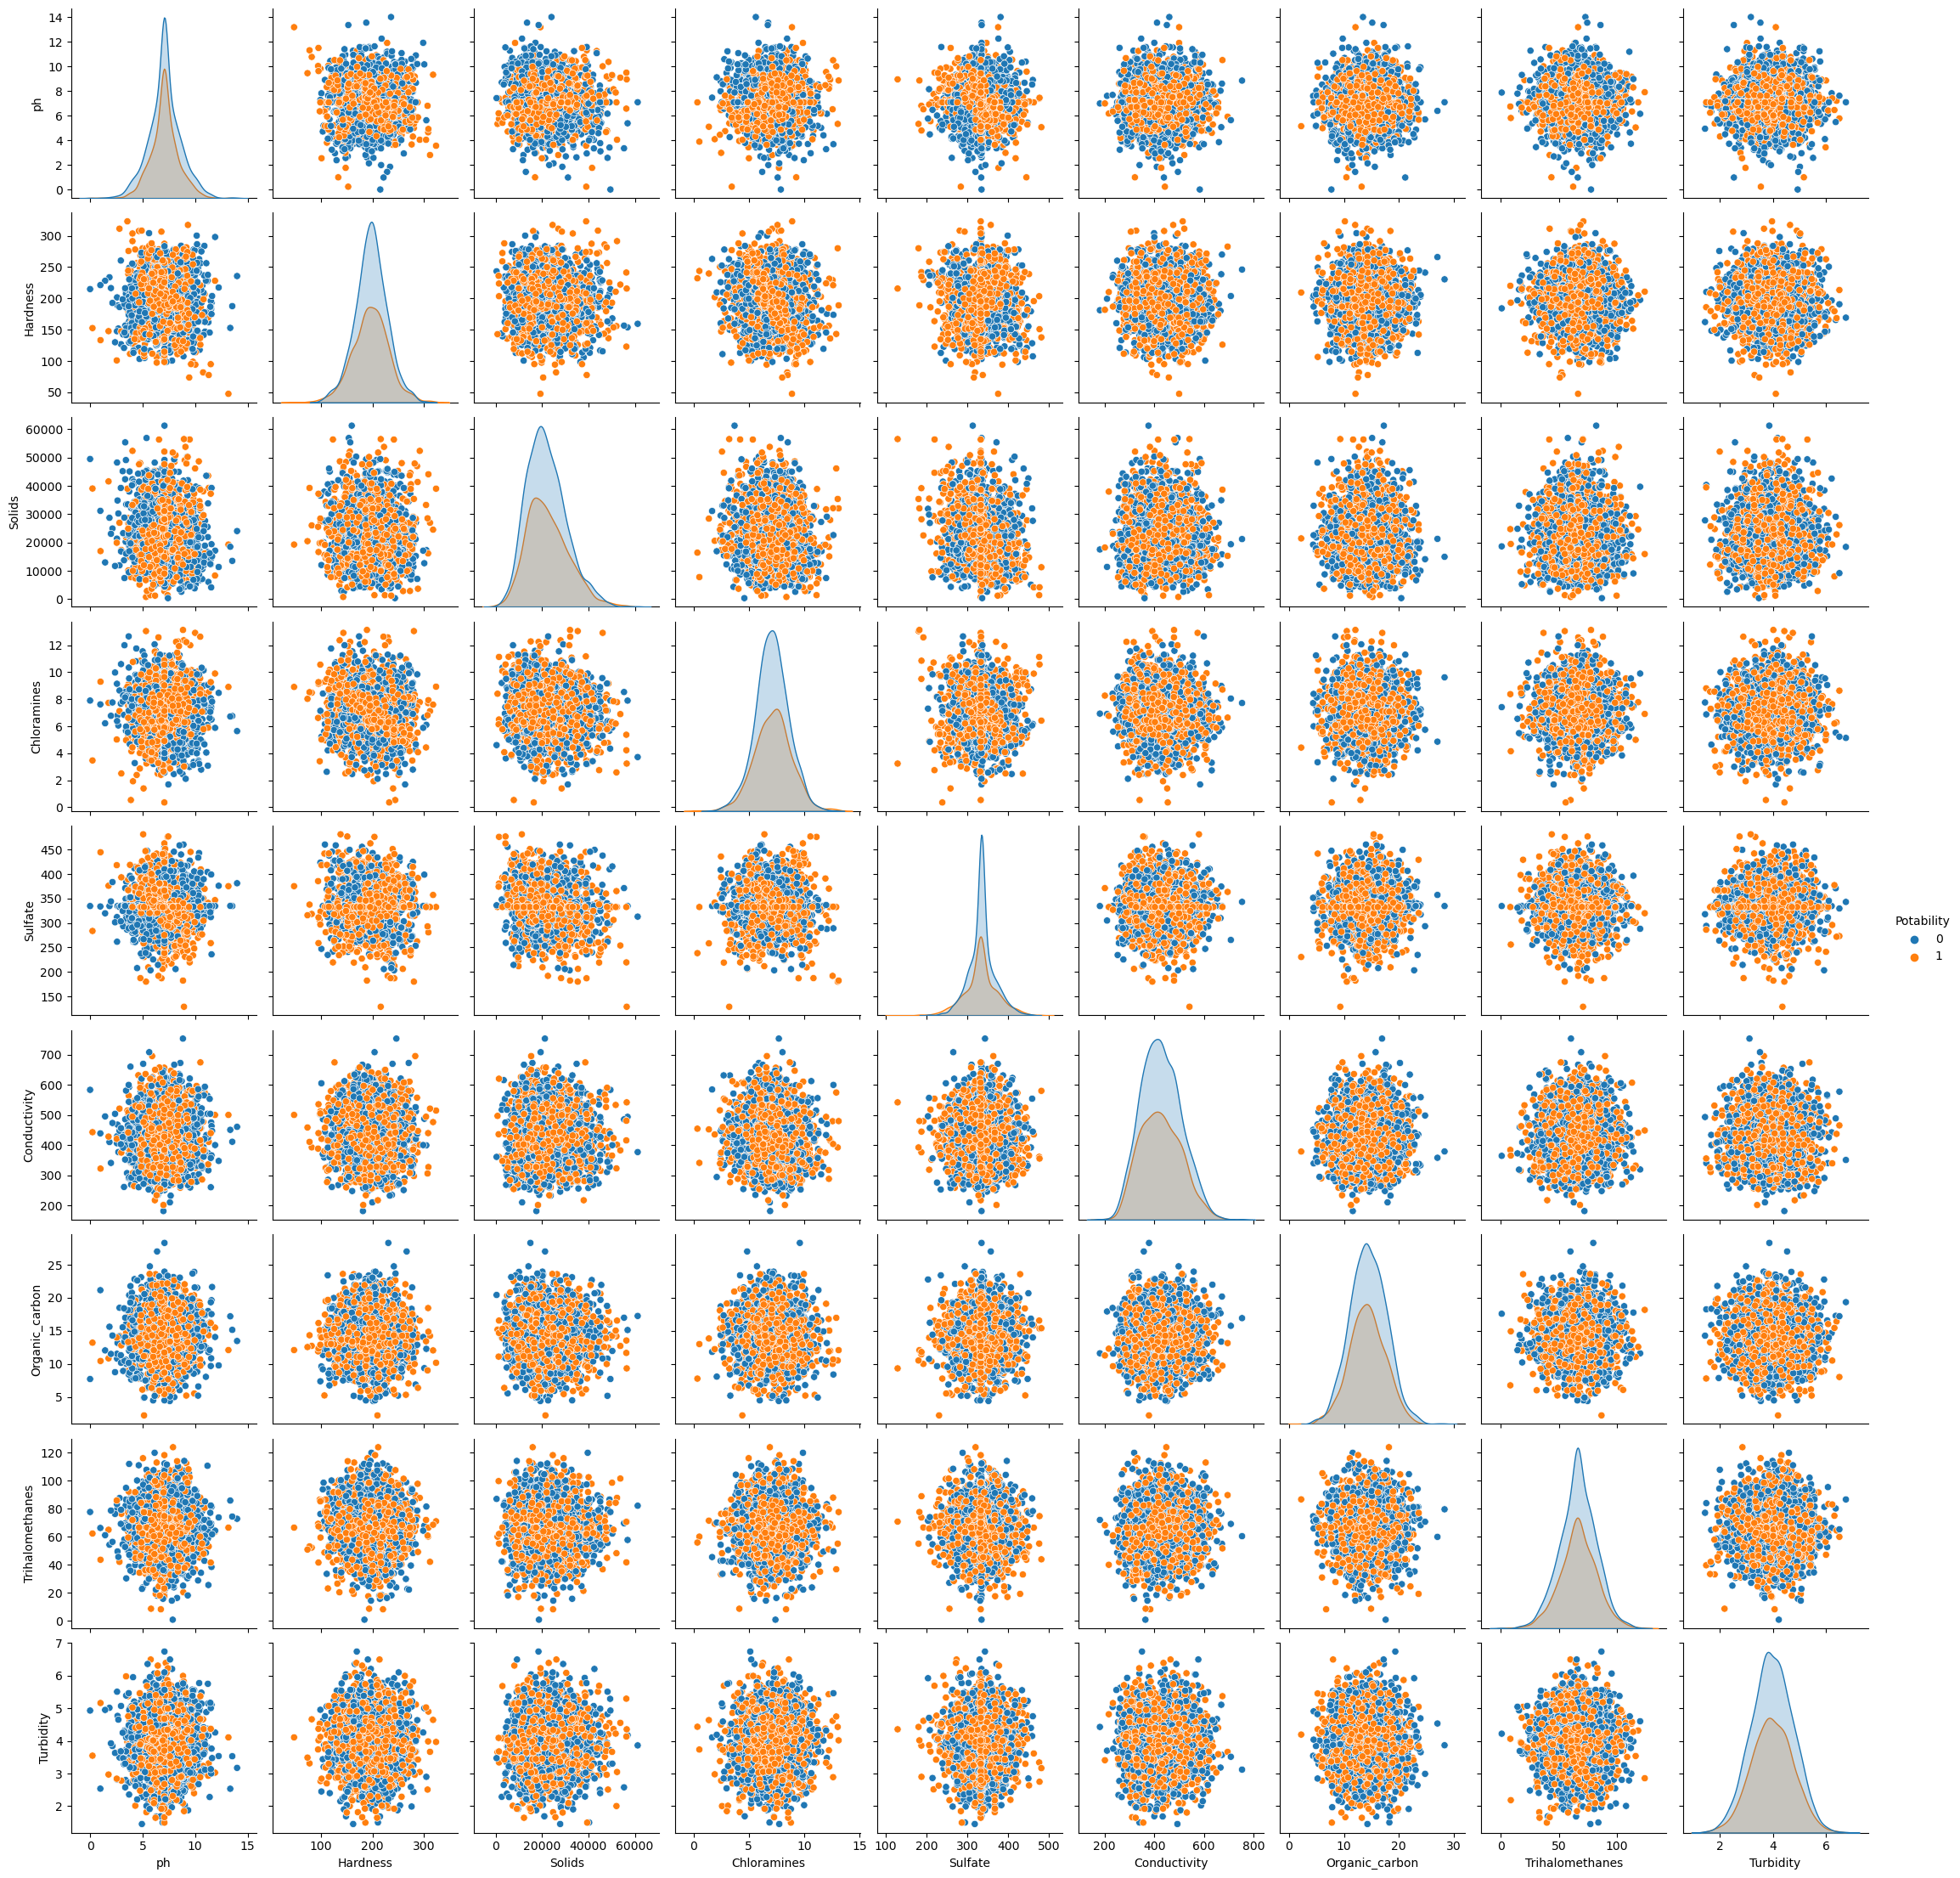

In [11]:
sns.pairplot(cleaned_df, hue='Potability', diag_kind='kde')

plt.show()

<b>Correlation Analysis</b>

This code generates the correlation matrix.

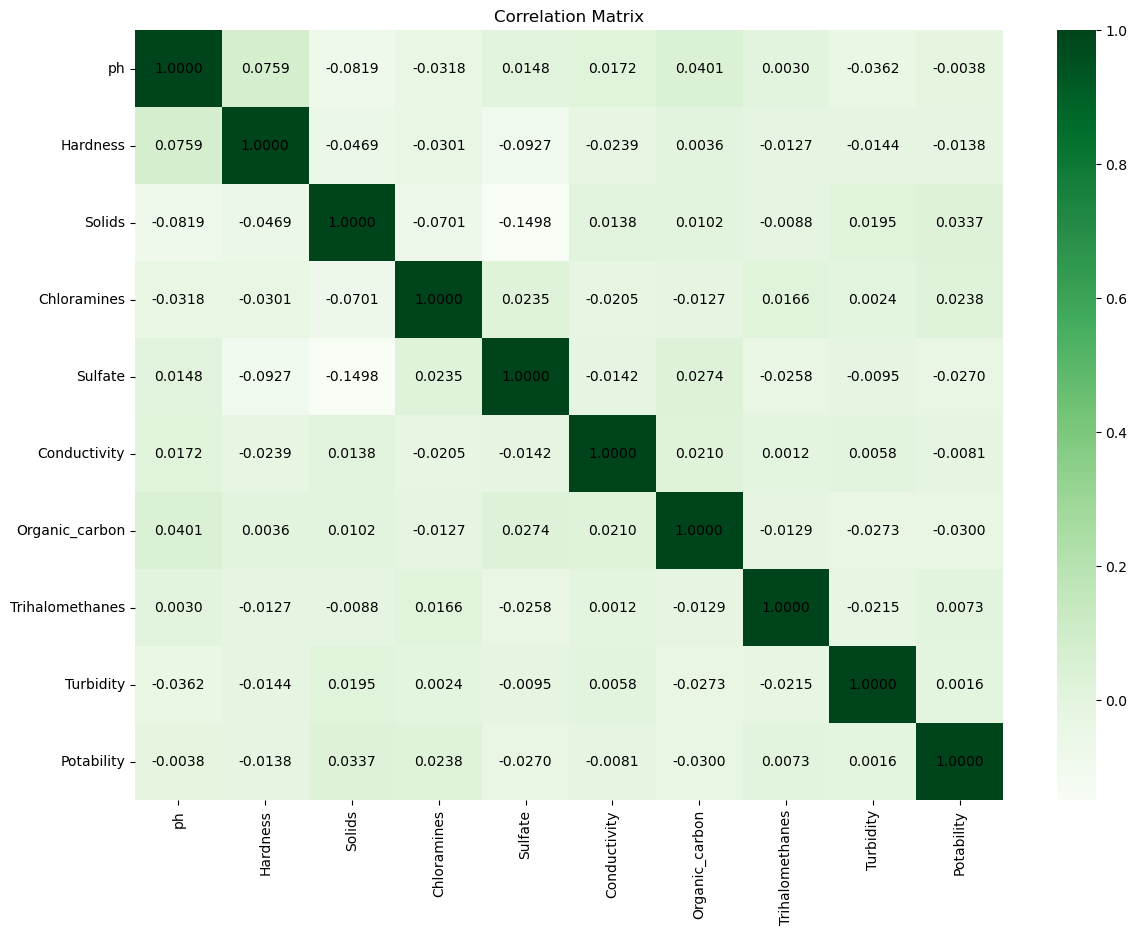

In [12]:
#calculate the correlation matrix
matrix = cleaned_df.corr()

#plot the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(matrix, cmap="Greens", fmt=".4f") 

#manually insert all values 
for i in range(len(matrix)):
    for j in range(len(matrix)):
        plt.text(j + 0.5, i + 0.5, f'{matrix.iloc[i, j]:.4f}', ha='center', va='center', color='black', fontsize=10)
plt.title('Correlation Matrix')
plt.show()

<b>Hypothesis Testing</b>

This generates the hypothesis testing.

We first preform the t-test for all features. Then, we plot the p-values using bar plot with alpha set to 0.06.

Feature: Solids, p-value: 0.0535
Feature: Organic_carbon, p-value: 0.0860
Feature: Sulfate, p-value: 0.1229
Feature: Chloramines, p-value: 0.1736
Feature: Hardness, p-value: 0.4285
Feature: Conductivity, p-value: 0.6419
Feature: Trihalomethanes, p-value: 0.6760
Feature: ph, p-value: 0.8257
Feature: Turbidity, p-value: 0.9279


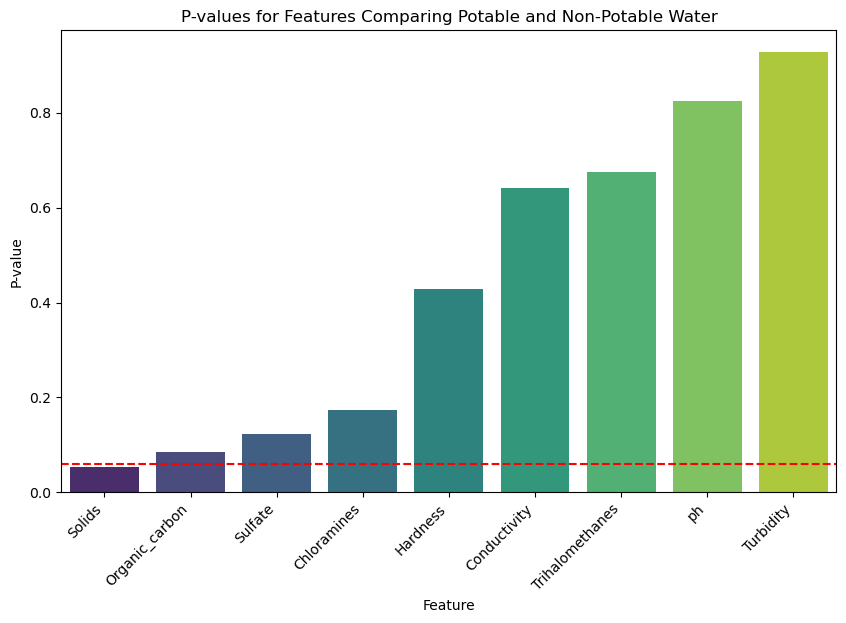

In [13]:
from scipy.stats import ttest_ind

# Separate the dataset into potable and non-potable groups
non_potable = cleaned_df[cleaned_df.iloc[:, -1] == 0]
potable = cleaned_df[cleaned_df.iloc[:, -1] == 1]
# List out the features
features = df.columns[:-1]

# Initialize a dictionary to store results 
results = {}

# Perform t-tests for each feature
for feature in features:
    stat, p_value = ttest_ind(potable[feature], non_potable[feature])
    results[feature] = p_value

# Convert the results to a DataFrame for easy plotting
results_df = pd.DataFrame(list(results.items()), columns=['Feature', 'p-value'])

# Sort the DataFrame by p-value in ascending order
results_df.sort_values(by='p-value', inplace=True)

# Print out p-values
for idx, row in results_df.iterrows():
    print(f"Feature: {row['Feature']}, p-value: {row['p-value']:.4f}")
    
# Plot the p-values using a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Feature', y='p-value', data=results_df, palette='viridis')
plt.axhline(0.06, color='red', linestyle='--')  # Significance level line
plt.title('P-values for Features Comparing Potable and Non-Potable Water')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Feature')
plt.ylabel('P-value')
plt.show()

## Model Selection and Optimization

We first split the dataset into training and testing sets. We then train 4 models for the data.

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

#separate features and target
X = cleaned_df.drop(columns=['Potability'])
y = cleaned_df['Potability']

#split dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<b>1. Random Forest Classifier</b>

In [15]:
from sklearn.metrics import accuracy_score

#This initializes the Random Forest and trains the model.
rf_model_selected = RandomForestClassifier(random_state=42)
rf_model_selected.fit(X_train, y_train)

#The model predicts the training and testing set.
y_pred_train = rf_model_selected.predict(X_train)
y_pred_test = rf_model_selected.predict(X_test)

#calculate accuracies
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)
print("Accuracy on training set:", accuracy_train)
print("Accuracy on testing set:", accuracy_test)

Accuracy on training set: 1.0
Accuracy on testing set: 0.8246951219512195


<b>2. Decision Tree Classifier</b>

In [16]:
from sklearn.tree import DecisionTreeClassifier

#Initialize the Decision Tree Classifier
tree_model = DecisionTreeClassifier(random_state=42)
#Train the model
tree_model.fit(X_train, y_train)

#Model predicts the training and testing set
y_pred_train_tree = tree_model.predict(X_train)
y_pred_test_tree = tree_model.predict(X_test)

#calculate accuracies
train_accuracy = accuracy_score(y_train, y_pred_train_tree)
test_accuracy = accuracy_score(y_test, y_pred_test_tree)
print("Accuracy on training set (Decision Tree):", train_accuracy)
print("Accuracy on testing set (Decision Tree):", test_accuracy)

Accuracy on training set (Decision Tree): 1.0
Accuracy on testing set (Decision Tree): 0.7469512195121951


<b>3. Logistic Regression</b>

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#Initialize the Logistic regression and fit the training data
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)

#Model predicts the training and testing set
y_pred_train_logistic = logistic_model.predict(X_train)
y_pred_test_logistic = logistic_model.predict(X_test)

#calculate accuracies
accuracy_train_logistic = accuracy_score(y_train, y_pred_train_logistic)
accuracy_test_logistic = accuracy_score(y_test, y_pred_test_logistic)
print("Accuracy on training set (Logistic Regression):", accuracy_train_logistic)
print("Accuracy on testing set (Logistic Regression):", accuracy_test_logistic)

Accuracy on training set (Logistic Regression): 0.6057251908396947
Accuracy on testing set (Logistic Regression): 0.6280487804878049


C:\Users\Yap Jack\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<b>4. K-nearest Neigbors Classifier</b>

In [18]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=9) 
# Fit the classifier to the training data for training 
knn_classifier.fit(X_train, y_train)

# Make predictions on both the training and testing sets
y_pred_train_knn = knn_classifier.predict(X_train)
y_pred_test_knn = knn_classifier.predict(X_test)

# Calculate accuracy on training and testing sets
accuracy_train_knn = accuracy_score(y_train, y_pred_train_knn)
accuracy_test_knn = accuracy_score(y_test, y_pred_test_knn)
print("Accuracy on training set (KNN):", accuracy_train_knn)
print("Accuracy on testing set (KNN):", accuracy_test_knn)

Accuracy on training set (KNN): 0.667175572519084
Accuracy on testing set (KNN): 0.538109756097561


<b>Optimized Random Forest Classifier</b>

These hyperparameters were selected based on their performance in cross-validation, balancing model complexity and generalizability.


In [19]:
from sklearn.model_selection import GridSearchCV

#Parameter grid
param_grid = {
    'n_estimators': [50, 100, 200], # Number of trees in the forest
    'max_depth': [10, 15, 20], # Maximum depth of the trees
    'min_samples_split': [2, 5, 10], # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 3, 5] # Minimum number of samples required to be at a leaf node
}

#Initialize RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)

#Initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy')

#Fit GridSearchCV
grid_search.fit(X_train, y_train)

#Get best parameters and best model
best_params = grid_search.best_params_
best_rf_model = grid_search.best_estimator_

#Predictions on training and testing sets
y_pred_train = best_rf_model.predict(X_train)
y_pred_test = best_rf_model.predict(X_test)

accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)
print("Adjusted Hyperparameters:", best_params)
print("Accuracy on training set (adjusted model):", accuracy_train)
print("Accuracy on testing set (adjusted model):", accuracy_test)

Adjusted Hyperparameters: {'max_depth': 15, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy on training set (adjusted model): 0.9488549618320611
Accuracy on testing set (adjusted model): 0.8064024390243902


## Results

Below shows the detailed evaluation metrics of the original random forest classifier

<b>Classification Report</b>

In [20]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

#Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_test))


Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.94      0.86       412
           1       0.85      0.58      0.69       244

    accuracy                           0.81       656
   macro avg       0.82      0.76      0.78       656
weighted avg       0.81      0.81      0.80       656



<b>Confusion Matrix</b>


Confusion Matrix:
[[387  25]
 [102 142]]


C:\Users\Yap Jack\AppData\Local\Temp\ipykernel_17028\3642100375.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([''] + ['Negative', 'Positive'])
C:\Users\Yap Jack\AppData\Local\Temp\ipykernel_17028\3642100375.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([''] + ['Negative', 'Positive'])


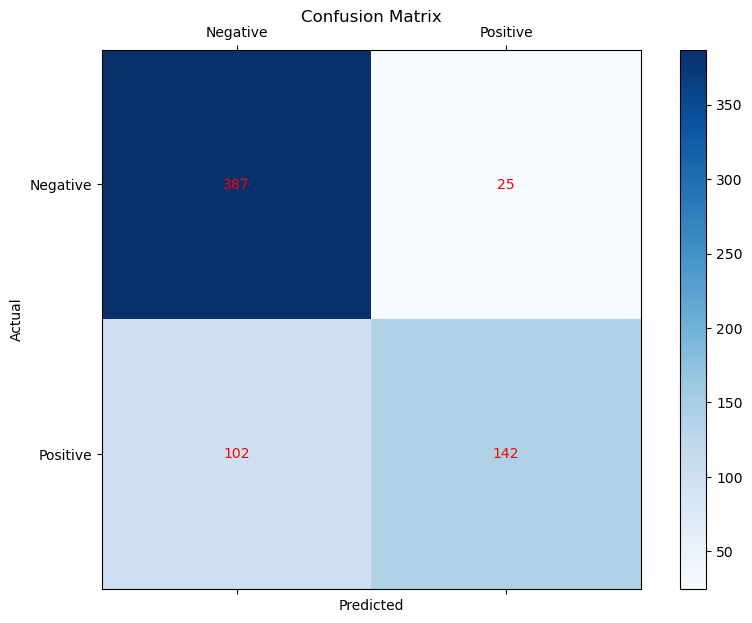

In [21]:
import numpy as np

#Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_test)

#Print out the confusion matrix
print("\nConfusion Matrix:")
print(conf_matrix)

#Manually plot confusion matrix values
fig, ax = plt.subplots(figsize=(10, 7))
cax = ax.matshow(conf_matrix, cmap='Blues')
plt.title('Confusion Matrix', pad=20)
plt.colorbar(cax)

for (i, j), val in np.ndenumerate(conf_matrix):
    plt.text(j, i, f'{val}', ha='center', va='center', color='red')

plt.xlabel('Predicted')
plt.ylabel('Actual')
ax.set_xticklabels([''] + ['Negative', 'Positive'])
ax.set_yticklabels([''] + ['Negative', 'Positive'])
plt.show()

<b>ROC-AUC Curve</b>


ROC AUC Score: 0.8784269059366544


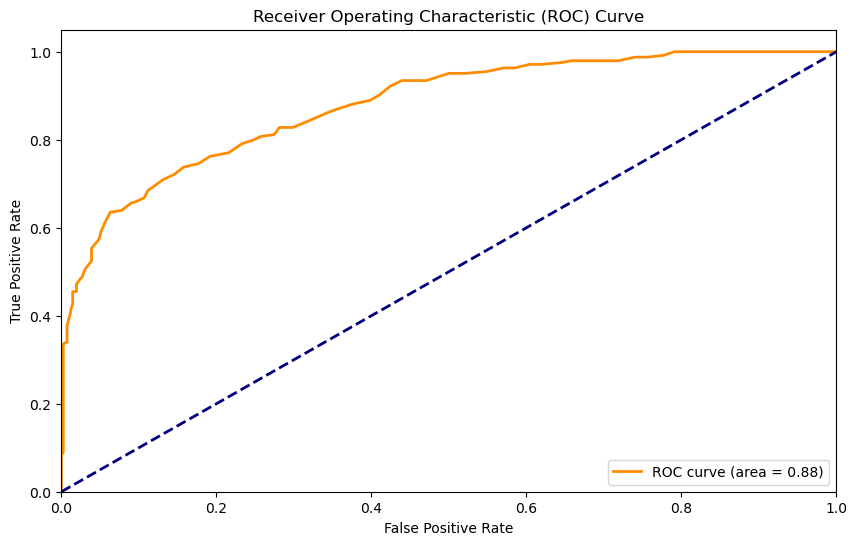

In [22]:
#Predict probabilities
y_pred_proba_test = rf_model_selected.predict_proba(X_test)[:, 1]

#Calculate and print ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba_test)
print("\nROC AUC Score:", roc_auc)

#Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_test)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()